<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** the units in a neural network that recieve inputs from other nodes or an external source to compute an output
- **Input Layer:** This is the data collected for each of the independent variables (x1, x2, x... , or X)
- **Hidden Layer:** These are layers containing different itterations of an activation function; inputs are fed to this layer and assigned different weights accross a span of nodes/neurons/activation functions to determine the makeup of the output layer.
- **Output Layer:** This is the layer that transmits information from the neural network to the user
- **Activation:** This is the source of non-linearity in the outputs of a neuron/node and determines what gets passed to latter layers of a neural-network
- **Backpropagation:** refers to a method of training a neural network; it involves the use of an algorithm to update the weights being used which get updated in reverse order after a training epoch


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [1]:
import pandas as pd
import numpy as np
candy = pd.read_csv('chocolate_gummy_bears.csv')

In [2]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data anlysis code) after your perceptron implementation. 

In [3]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values
print(X.shape,y.shape)

(10000, 2) (10000,)


In [4]:
candy.ate.value_counts()

1    5000
0    5000
Name: ate, dtype: int64

In [5]:
X[0], y[0]

(array([0, 1]), 1)

In [6]:
n_features = X.shape[1]

weights = np.zeros(1 + n_features)

weights

array([0., 0., 0.])

In [7]:
rate = 0.01
niter = 100

In [8]:
errors = []
for i in range(niter):
    err = 0
    #print('Iteration:', i, '\n')
    for xi, target in zip(X, y):
        #print('Inputs')
        #print('Row {} feature values:'.format(i), xi, '\nRow {} target class:'.format(i), target, '\n')
        #print('Initial Operations')
        #print('Dot product of feature values and weights:', np.dot(xi, weights[1:]))
        net_input = np.dot(xi, weights[1:]) + weights[0]
        #print('Sum of dot product and our bias (aka net input):', net_input, '\n')
        prediction = np.where(net_input >= 0.0, 1, -1)
        #print('Prediction:', prediction, '\n')
        #print('Update Weights and Bias')
        delta_w = rate * (target - prediction)
        #print('Current weights:', weights[1:])
        #print('Weight change:', delta_w)
        weights[1:] += delta_w * xi
        #print('Updated weights:', weights[1:])
        #print('Current bias term:', weights[0])
        weights[0] += delta_w
        #print('Updated bias term:', weights[0])
        err += int(delta_w != 0.0)
        #print('--------------------\n')
    #print('************************************************\n\n')
    errors.append(err)

In [9]:
best = min(errors)
prop_miss = 1 - (best)/len(X)
print(best, prop_miss)

6268 0.3732


In [10]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show();

<Figure size 640x480 with 1 Axes>

Accuracy: less than 50% (37.52%)  

Question: Explain why you could not achieve a higher accuracy with the simple perceptron architecture, because it's possible to achieve ~95% accuracy on this dataset.

The above basic perceptron couldn't be improved beyond the low accuracy identified. As is seen in the plot just above, its predictive performance bottoms out at around 37.52 percent (vs. a 50% baseline). This might be attributed to a failing to build on the measures of error to improve the model. One method to do this is through backpropogation. 

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [11]:
X = X.astype('float64')
y = y.astype('float64')

In [12]:
y3 = np.reshape(y, (10000,1))
y3

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [13]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.input = 2
        self.hiddenNodes = 6 
        self.outputNodes = 1
        
        # Initial Weights
        self.weights1 = np.random.randn(self.input,self.hiddenNodes)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        

    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    
    def feed_forward(self,X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted sum of inputs & hidden
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    
    def backward(self, X, y, o):
        """
        Backward propagate through the network
        """
        self.o_error = y - o #error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # apply derivative of sigmoid to error
        
        self.z2_error = self.o_delta.dot(self.weights2.T) # z2 error: how much our hidden layer weights were off
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y, o)

In [14]:
nn = NeuralNetwork()

print(X[0])
output = nn.feed_forward(X[0])
print("output", output)

[0. 1.]
output [0.55716785]


In [15]:
error = y3[0] - output
error

array([0.44283215])

In [16]:
output_all = nn.feed_forward(X)
error_all = y3 - output_all
print(output_all)
print(error_all)

[[0.55716785]
 [0.26079709]
 [0.55716785]
 ...
 [0.55716785]
 [0.55716785]
 [0.26079709]]
[[0.44283215]
 [0.73920291]
 [0.44283215]
 ...
 [0.44283215]
 [0.44283215]
 [0.73920291]]


In [19]:
# Find which layer is producing poor weights
attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'activated_output','output']

[print(i + '\n', getattr(nn,i), '\n'+'---'*3) for i in dir(nn) if i in attributes]

activated_hidden
 [[9.48171804e-01 2.69593186e-01 3.77105889e-01 4.96529264e-03
  9.99854925e-01 6.30095853e-01]
 [1.16362016e-01 9.99125359e-01 9.99753620e-01 1.23833727e-04
  1.00000000e+00 1.67495417e-01]
 [9.48171804e-01 2.69593186e-01 3.77105889e-01 4.96529264e-03
  9.99854925e-01 6.30095853e-01]
 ...
 [9.48171804e-01 2.69593186e-01 3.77105889e-01 4.96529264e-03
  9.99854925e-01 6.30095853e-01]
 [9.48171804e-01 2.69593186e-01 3.77105889e-01 4.96529264e-03
  9.99854925e-01 6.30095853e-01]
 [1.16362016e-01 9.99125359e-01 9.99753620e-01 1.23833727e-04
  1.00000000e+00 1.67495417e-01]] 
---------
activated_output
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]] 
---------
hidden_sum
 [[ 2.90660139 -0.99668755 -0.50185052 -5.30030538  8.83811568  0.53262805]
 [-2.0273413   7.0408215   8.30838919 -8.99644696 36.05501183 -1.60348273]
 [ 2.90660139 -0.99668755 -0.50185052 -5.30030538  8.83811568  0.53262805]
 ...
 [ 2.90660139 -0.99668755 -0.50185052 -5.30030538  8.83811568  0.53262805]
 [ 2.90

[None, None, None, None, None]

Low predictions? -> Try increasing weights in either layer. Biggest positive effect from increasing weights in places where there are already high activation values. Decrease activations that correspond to negative weights and increase activations corresponding with positive weights. 

In [21]:
nn = NeuralNetwork()

# Train the nn over 100 epochs 
for i in range(100):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 50 == 0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y3)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y3 - nn.feed_forward(X)))))
    nn.train(X,y3) 

+---------EPOCH 1---------+
Input: 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Actual Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Predicted Output: 
 [[0.17548768]
 [0.21072884]
 [0.17548768]
 ...
 [0.17548768]
 [0.17548768]
 [0.21072884]]
Loss: 
 0.34377643581125084
+---------EPOCH 2---------+
Input: 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Actual Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
 0.5
+---------EPOCH 3---------+
Input: 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Actual Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
 0.5
+---------EPOCH 4---------+
Input: 
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Actual Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Predicted Output: 
 [[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
Loss: 
 0.5
+---------EPOCH 

The accuracy? It appears stalled at 50% (the baseline). 

In [23]:
# Another method before moving on to part 3

class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [26]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [27]:
NN = Neural_Network()

In [28]:
T = trainer(NN)

In [30]:
T.train(X,y3)

         Current function value: 260.243590
         Iterations: 29
         Function evaluations: 103
         Gradient evaluations: 92


In [41]:
print("Predicted Output: \n" + str(NN.forward(X))) 
print("Loss: \n" + str(np.mean(np.square(y3 - NN.forward(X)))))
# for regression analysis 

from sklearn.metrics import accuracy_score
print(accuracy_score(y3, NN.forward(X)))
# for categorical analysis

Predicted Output: 
[[0.94741061]
 [0.94777014]
 [0.94741061]
 ...
 [0.94741061]
 [0.94741061]
 [0.94777014]]
Loss: 
0.05204871807479738


ValueError: Classification metrics can't handle a mix of binary and continuous targets

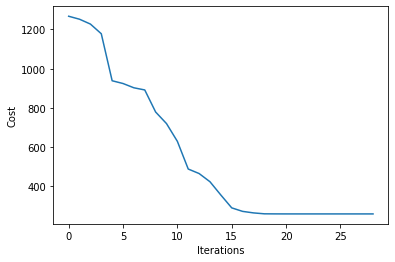

In [31]:
import matplotlib.pyplot as plt
plt.plot(T.J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()   

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [80]:
import sklearn
import keras
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0


In [81]:
X = df.iloc[:,0:14]
y = df.values[:,-1].astype('bool')

print(X.shape,y.shape)

(303, 14) (303,)


In [82]:
names = X.columns# Create the Scaler object
scaler = StandardScaler()# Fit your data on the scaler object
scaled_X = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df, columns=names)

In [83]:
X = X.values
X.shape

(303, 14)

In [84]:
# Gather the baseline
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(242, 14) (242,) (61, 14) (61,)


In [94]:
#Frame the model

# Plant a random seed for reproducibility
seed = 1
np.random.seed(seed)

# Function to create model, required for KerasClassifier
def create_model():
    # create model - Sigmoid activation function for binary/boolean type
    model = Sequential()
    model.add(Dense(24, input_dim=14, activation='sigmoid'))
    model.add(Dropout(rate = .3))
    model.add(Dense(12, activation='sigmoid'))
#     model.add(Dropout(rate = .3))
#     model.add(Dense(6, activation='sigmoid'))
#     model.add(Dropout(rate = .1))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# X = X_train
# y = y_train

# y_train =  keras.utils.to_categorical(y_train, 2)
# y_test = keras.utils.to_categorical(y_test, 2)

# create model; verbose? Yes
model = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters; Bests: batch_size = , epochs = 
param_grid = {'batch_size': [1,10,30,60,120],  
              'epochs': [10]
             } # These are the parameters that can be passed into the .fit() function:
#               fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, 
#                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
#                 sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None,
#                validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#grid_result = grid.fit(tf.convert_to_tensor(X_train.values, dtype=tf.float64),
#                      tf.convert_to_tensor(y_train.values, dtype=tf.float64))
#grid_result = grid.fit(tf.convert_to_tensor(X.values, dtype = tf.float64),
#                        tf.convert_to_tensor(y.values, dtype = tf.float64))

grid_result = grid.fit(X_train, y_train)

# Report Results - best accuracy = 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/Users/Person/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/Person/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 242 samples
Epoch 1/10
242/242 [==============================] - 1s 2ms/sample - loss: 0.8004 - accuracy: 0.5413
Epoch 2/10
242/242 [==============================] - 0s 171us/sample - loss: 0.7681 - accuracy: 0.5413
Epoch 3/10
242/242 [==============================] - 0s 118us/sample - loss: 0.7484 - accuracy: 0.5413
Epoch 4/10
242/242 [==============================] - 0s 114us/sample - loss: 0.7368 - accuracy: 0.5413
Epoch 5/10
242/242 [==============================] - 0s 136us/sample - loss: 0.7228 - accuracy: 0.5413
Epoch 6/10
242/242 [==============================] - 0s 128us/sample - loss: 0.7152 - accuracy: 0.5413
Epoch 7/10
242/242 [==============================] - 0s 140us/sample - loss: 0.6991 - accuracy: 0.5413
Epoch 8/10
242/242 [==============================] - 0s 136us/sample - loss: 0.7000 - accuracy: 0.5413
Epoch 9/10
242/242 [==============================] - 0s 143us/sample - loss: 0.6971 - accuracy: 0.5413
Epoch 10/10
242/242 [========================

### Higher batch_size yields better accuracy. Hold at 120 for next search. 

In [95]:
# define the grid search parameters; Bests: batch_size = , epochs = 
param_grid = {'batch_size': [120],  
              'epochs': [10, 20, 40, 80, 160]
             } # These are the parameters that can be passed into the .fit() function:
#               fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, 
#                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
#                 sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None,
#                validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#grid_result = grid.fit(tf.convert_to_tensor(X_train.values, dtype=tf.float64),
#                      tf.convert_to_tensor(y_train.values, dtype=tf.float64))
#grid_result = grid.fit(tf.convert_to_tensor(X.values, dtype = tf.float64),
#                        tf.convert_to_tensor(y.values, dtype = tf.float64))

grid_result = grid.fit(X_train, y_train)

# Report Results - best accuracy = 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/Users/Person/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 242 samples
Epoch 1/40
242/242 [==============================] - 1s 3ms/sample - loss: 0.8574 - accuracy: 0.5413
Epoch 2/40
242/242 [==============================] - 0s 34us/sample - loss: 0.8405 - accuracy: 0.5413
Epoch 3/40
242/242 [==============================] - 0s 55us/sample - loss: 0.8354 - accuracy: 0.5413
Epoch 4/40
242/242 [==============================] - 0s 45us/sample - loss: 0.8315 - accuracy: 0.5413
Epoch 5/40
242/242 [==============================] - 0s 104us/sample - loss: 0.8232 - accuracy: 0.5413
Epoch 6/40
242/242 [==============================] - 0s 137us/sample - loss: 0.8075 - accuracy: 0.5413
Epoch 7/40
242/242 [==============================] - 0s 157us/sample - loss: 0.8047 - accuracy: 0.5413
Epoch 8/40
242/242 [==============================] - 0s 123us/sample - loss: 0.7961 - accuracy: 0.5413
Epoch 9/40
242/242 [==============================] - 0s 52us/sample - loss: 0.7920 - accuracy: 0.5413
Epoch 10/40
242/242 [============================

### Refining the search for a good number of epochs:

In [96]:
# define the grid search parameters; Bests: batch_size = , epochs = 
param_grid = {'batch_size': [120],  
              'epochs': [30, 40, 50, 60, 70]
             } # These are the parameters that can be passed into the .fit() function:
#               fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, 
#                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
#                 sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None,
#                validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False)


# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#grid_result = grid.fit(tf.convert_to_tensor(X_train.values, dtype=tf.float64),
#                      tf.convert_to_tensor(y_train.values, dtype=tf.float64))
#grid_result = grid.fit(tf.convert_to_tensor(X.values, dtype = tf.float64),
#                        tf.convert_to_tensor(y.values, dtype = tf.float64))

grid_result = grid.fit(X_train, y_train)

# Report Results - best accuracy = 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/Users/Person/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 242 samples
Epoch 1/70
242/242 [==============================] - 1s 2ms/sample - loss: 0.8953 - accuracy: 0.4587
Epoch 2/70
242/242 [==============================] - 0s 60us/sample - loss: 0.8738 - accuracy: 0.4587
Epoch 3/70
242/242 [==============================] - 0s 131us/sample - loss: 0.8697 - accuracy: 0.4587
Epoch 4/70
242/242 [==============================] - 0s 133us/sample - loss: 0.8584 - accuracy: 0.4587
Epoch 5/70
242/242 [==============================] - 0s 158us/sample - loss: 0.8427 - accuracy: 0.4587
Epoch 6/70
242/242 [==============================] - 0s 117us/sample - loss: 0.8273 - accuracy: 0.4587
Epoch 7/70
242/242 [==============================] - 0s 112us/sample - loss: 0.8129 - accuracy: 0.4587
Epoch 8/70
242/242 [==============================] - 0s 118us/sample - loss: 0.8169 - accuracy: 0.4587
Epoch 9/70
242/242 [==============================] - 0s 88us/sample - loss: 0.8040 - accuracy: 0.4587
Epoch 10/70
242/242 [==========================

### Better results with number of epochs set to 70

### Improving the Neural Network:

In [102]:
import tensorflow
from tensorflow import keras

In [116]:
import matplotlib.pyplot as plt
import keras
import keras.layers

y_binary_train = keras.utils.to_categorical(y_train)
y_binary_test = keras.utils.to_categorical(y_test)


model = Sequential()
model.add(Dense(units=32, activation='sigmoid', input_shape=(14,)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_binary_train, batch_size=120, epochs=70, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(X_test, y_binary_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show();

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

ValueError: A target array with shape (242, 2) was passed for an output of shape (None, 1) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.